## Python imports

In [1]:
import scipy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.spatial import ConvexHull
import scipy.optimize

from ipywidgets import interactive
from IPython.display import display

%matplotlib inline

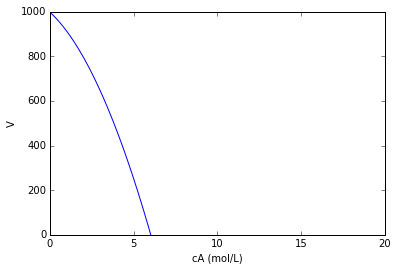

In [2]:
def plot_fn(sale_factor=2.4, sep_factor=0.35, vol_factor=0.05, n_years=2):
      
    Cplant = 45.0*(1.15**n_years)
    
    Cf = [20.0, 1e-6]
    Q = 1.2
    cA_range = sp.linspace(Cf[0],0.0,100)
    x_range = 1.0 - cA_range/Cf[0]
    cB_range = Cf[1] + Cf[0]*x_range
    
    taus = []
    for cA_i,cB_i in zip(cA_range,cB_range):
        Vi = (1/vol_factor)*(sale_factor*cB_i - sep_factor*cA_i**2 - Cplant/n_years)
        taus.append(Vi/Q)
        
    #print Vs
    
    plt.figure()
    plt.hold(True)

    plt.plot(cA_range,taus, "b-")

    plt.axis([0,20,0,1000])
    plt.xlabel('cA (mol/L)')
    plt.ylabel('V')
    plt.show()
    
v = interactive(plot_fn, sale_factor=(0,5,0.1), sep_factor=(0.01,5,0.01), vol_factor=(0.01,0.1,0.01), n_years=(2,9,3))
display(v)